<h1 style="text-align:center;">Optional Assignment for Quiz 1</h1>
<p>
    # Thakur, Nishant <br>
    # 1001-544-591 <br>
    # 2018-09-26 <br>
    # Assignment-optional-01 <br>
</p>

<h3>Chapter 4 </h3>
<p> E4.1 </p>

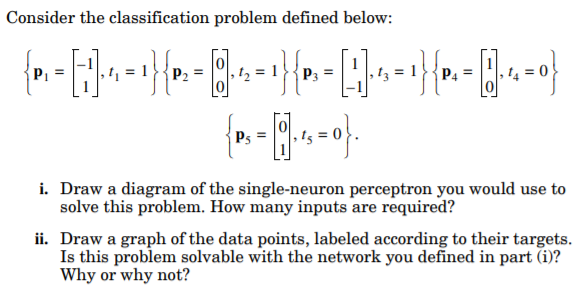

<b>Solution:<br> i.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;   Following is the diagram of the single-neuron perceptron with 2 inputs and 1 output which will be used to solve this problem. We require 2 inputs as the input vector has 2 values.


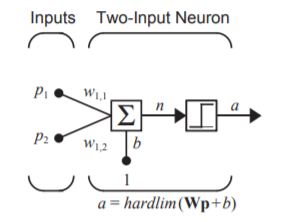

<b>ii. </b><br>


In [65]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors as c
import time

In [66]:
# Function to plot the graph with decission boundry.
def plot(weights, bias, points1, points2):
    fig = plt.figure()
    ax = fig.gca()
    resolution=100
    xs = np.linspace(-4., 4., resolution)
    ys = np.linspace(-4., 4., resolution)
    xx, yy = np.meshgrid(xs, ys)
    zz = weights[0] * xx + weights[1] * yy + bias
    zz[zz<0] =- 0
    zz[zz>0] =+ 1
    cMap = c.ListedColormap(['g','r'])
    quad = ax.pcolormesh(xs, ys, zz, cmap = cMap)
    p1 = points1.T
    p2 = points2.T
    ax.scatter(p1[0], p1[1], marker='^', color = 'k')
    ax.scatter(p2[0], p2[1], marker='o', color = 'b')
    black_patch = mpatches.Patch(color='black', label='Target = 1')
    blue_patch = mpatches.Patch(color='blue', label='Target = 0')
    plt.legend(handles=[black_patch, blue_patch])

    plt.show()

In [67]:
# Initialize the weights and bias randomly to begin training
weights = np.random.randint(-10, high = 10, size=(1, 2))[0]
bias = np.random.randn()

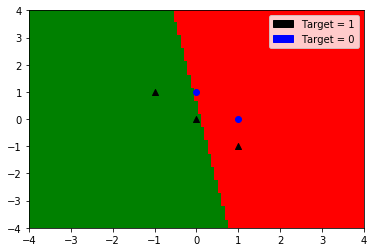

In [68]:
# Input points as given in the question
p1 = [-1, 1]
t1 = 1
p2 = [0, 0]
t2 = 1
p3 = [1, -1]
t3 = 1
p4 = [1, 0]
t4 = 0
p5= [0, 1]
t5 = 0
points1 = np.array([p1,p2,p3])
points2 = np.array([p4,p5])

plot(weights,bias, points1, points2)

In [69]:
# Activation function Symmetric Hardlimit
def activation(input_array,weights,bias):
    net_value = np.dot(weights, input_array.T) + bias
    return 1 if net_value >= 0 else 0

In [70]:
# Function to train the perceptron
# X : input to perceptron
# Y : the target output
# This function adjust the weights and bias for 100 steps using the learning rule.
def train(X, Y, weights, bias):
    for i in range(100):
        index = np.random.choice(X.shape[0], 1, replace=False)
        a = activation(X[index][0], weights, bias)
        e = Y[index] - a
        weights = weights + e * X[index]
        bias = bias + e
    plot(weights[0], bias, X[:len(points1)], X[len(points1):])

    return weights[0],bias

weights before training: [6 1]
bias before training: -0.4368226094885865


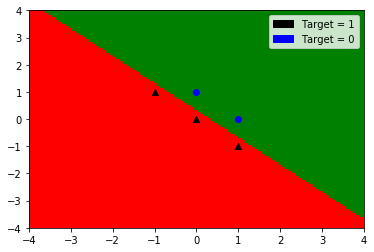

Updated weights after training: [-2 -2]
Updated bias after training: [0.56317739]


In [71]:
p = np.array([p1, p2, p3, p4, p5])
t = np.array([t1, t2, t3, t4, t5])

print("weights before training:", weights)
print("bias before training:", bias)
weights, bias = train(p, t, weights, bias)
print("Updated weights after training:", weights)
print("Updated bias after training:", bias)

<b>This problem can be solved using a single-neuron perceptron as it is linearly seperable. This can be verified by looking at the graph shown above.<b>

<br>
<br>
<h2> Chapter 5</h2>

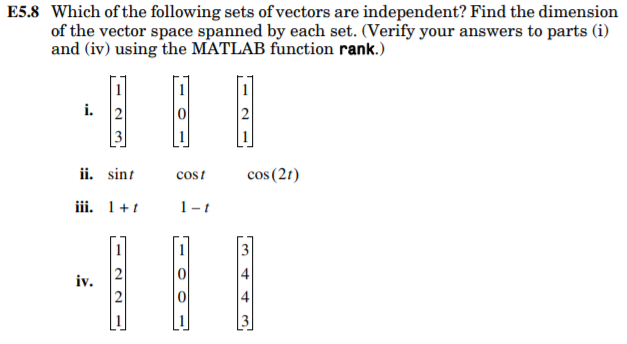

<b> Solution: </b>

<b>i. ==></b>  We represent the given vectors in matrix format as

In [72]:
m = np.array([[1,2,3],[1,0,1],[1,2,1]])
print(m)

[[1 2 3]
 [1 0 1]
 [1 2 1]]


If the matrix in this equation has an inverse, then the solution will require
that all coefficients be zero; therefore the vectors are independent. If the
matrix is singular (has no inverse), then a nonzero set of coefficients will
work, and the vectors are dependent. The test, then, is to create a matrix
using the vectors as columns. If the determinant of the matrix is zero (singular
matrix), then the vectors are dependent; otherwise they are independent.


In [73]:
determinant = np.linalg.det(m)
print(determinant)

4.0


The determinant of the matrix m is not 0. <b>Therefore the vectors are independent.</b><br>
The dimension of the space spanned by the vectors is 3. We can verify it by checking the rank of the matrix. 

In [74]:
rank = np.linalg.matrix_rank(m)
print(rank)

3


<br><br><br><br>

<b> ii. ==></b>  By using some trigonometric identities we can write

\begin{equation*}
cos(2t) = 1 - 2 sin^2(t) \\
Since,
sin^2(t) + cos^2(t) = 1 \\
cos(2t) = 1 - sin^2(t) - (1 - cos^2(t)) \\
cos(2t) = cos^2(t) - sin^2(t)
\end{equation*}

Therefore the vectors are dependent. The dimension of the space spanned by the vectors is 2, since no linear combination of sin t and cos t is identically zero.


<br><br><br><br>

<b> iii. ==></b> 

we can represent it in a matrix format as

In [75]:
m = np.array([[1,1],[-1,1]])
print(m)

[[ 1  1]
 [-1  1]]


In [76]:
determinant = np.linalg.det(m)
print(determinant)

2.0


The determinant of the matrix m is not 0. <b>Therefore the vectors are independent.</b><br>
The dimension of the space spanned by the vectors is 2. We can verify it by checking the rank of the matrix. 

In [77]:
rank = np.linalg.matrix_rank(m)
print(rank)

2


<br><br><br><br>

<b> iv. ==></b> 

 We represent the given vectors in matrix format as

In [78]:
m = np.array([[1,2,2,1],[1,0,0,1],[3,4,4,3]])
print(m)

[[1 2 2 1]
 [1 0 0 1]
 [3 4 4 3]]


This is similar to part (i), except that the number of vectors is less than the size of the vector space they are drawn from. In
this case the matrix made up of the vectors will not be square, so we will not be able to compute a determinant. However, we can use something called the Gramian. It is the determinant of a matrix whose i, j element is the inner product of vector i and vector j. The vectors are dependent if and only if the Gramian is zero.

For our problem the Gramian would be

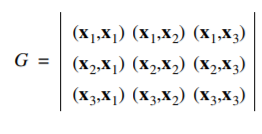


In [79]:
G = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        G[i][j] = np.dot(m[i],m[j])
        
print(G)


[[10.  2. 22.]
 [ 2.  2.  6.]
 [22.  6. 50.]]


Now we calculate the determinant of G.

In [80]:
determinant = np.linalg.det(G)
print(determinant, "which is approx. equal to 0.")

6.233397636440874e-14 which is approx. equal to 0.


The determinant of the matrix m is 0. <b>Therefore the vectors are dependent.</b><br>
The dimension of the space spanned by the vectors is 2. We can verify it by checking the rank of the matrix. 

In [81]:
rank = np.linalg.matrix_rank(G)
print(rank)

2


<br><br><br><br>

<b>Part 3: Design two questions from chapters 4 and 5 (as if you are designing a quiz).</b>

Chapter 4:

Find values of weights and bias for given points.
p1 = [1,1] t1 = 1
p2 = [1,2] t2 = 1

p3 = [-1,-1] t3 = -1
p4 = [-2,-3] t4 = -1.

Solution: 
So the line passing through origin can divide this points.
w1 = 1, w2 = 1, bias = 0

<br><br><br>


Chapter 5:<br>
Which of the following sets of vectors are independent? Find the dimension of the vector space spanned by each set.

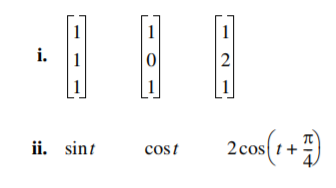

<b>Solution:</b><br>
<b> 1. </b><br>
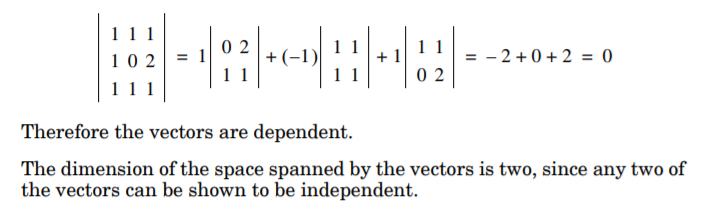

<b> 2. </b>

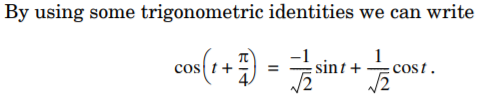

Therefore the vectors are dependent. The dimension of the space spanned by the vectors is two.